# $\color{Green}{\text{Fundamentals of Inference and Learning}}$ 
Name: Roduit \
Surname : Vincent \
Sciper: 325140
## Homework 2
### Exercise 1 : Classifying digits with Scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

### 1) Import and prepare datas

In [3]:
#Load datas
from sklearn.datasets import load_digits
x,y = load_digits(return_X_y=True)

In [4]:
# Change the output to 0 if even and 1 if odd
y = [0 if i % 2 == 0 else 1 for i in y]

In [5]:
#split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [6]:
#Check proportion of 1 in train and test
prop1_train = np.sum(y_train)/len(y_train)
prop1_test = np.sum(y_test)/len(y_test)
print(f'The proportion of 1 in the train set is {prop1_train*100:.2f}%')
print(f'The proportion of 1 in the test set is {prop1_test*100:.2f}%')

The proportion of 1 in the train set is 50.26%
The proportion of 1 in the test set is 50.89%


### 2) Logistic Regression

In [7]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)
def f1_score(y_pred, y_test):
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    return 2*tp/(2*tp + fp + fn)

### Cross validation to fix hyperparamters
1) Case with $\mathscr{l}_1$ penalty

In [22]:
def function_evaluation(model,model_name, parameters, x_train, y_train, n_splits=5,x_test=x_test, y_test=y_test, scoring='accuracy'):
        #Create pipeline
        pipe = make_pipeline(StandardScaler(), model)
        #Create cross validation
        cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=1)
        #Create grid search
        grid = GridSearchCV(pipe, param_grid=parameters, cv=cv, scoring=scoring, return_train_score=True)
        #Fit model
        grid.fit(x_train, y_train)
        if model_name == 'logistic':
                cvOptParam = 1 / grid.best_params_['logisticregression__C']
                tested_paramters = 1 / np.array(grid.cv_results_['param_logisticregression__C'].data)
                pipe.set_params(logisticregression__C=cvOptParam)
                y_pred = grid.predict(x_test)
                acc_pred = accuracy(y_pred, y_test)
        elif model_name == 'ridge':
                cvOptParam = 2 * grid.best_params_['ridgeclassifier__alpha']
                tested_paramters = 2 * np.array(grid.cv_results_['param_ridgeclassifier__alpha'].data)
                pipe.set_params(ridgeclassifier__alpha=cvOptParam)
                y_pred = grid.predict(x_test)
                acc_pred = accuracy(y_pred, y_test)
        elif model_name == 'svc':
                cvOptParam = 1 / grid.best_params_['linearsvc__C']
                tested_paramters = 1 / np.array(grid.cv_results_['param_linearsvc__C'].data)
                pipe.set_params(linearsvc__C=cvOptParam)
                y_pred = grid.predict(x_test)
                acc_pred = accuracy(y_pred, y_test)
        else:
                tested_paramters = np.array(grid.cv_results_['param_randomforestclassifier__n_estimators'].data)
                cvOptParam = grid.best_params_['randomforestclassifier__n_estimators']
                pipe.set_params(randomforestclassifier__n_estimators=cvOptParam)
                y_pred = grid.predict(x_test)
                acc_pred = accuracy(y_pred, y_test)
        
        trainAcc = grid.cv_results_['mean_train_score']
        testAcc = grid.cv_results_['mean_test_score']

        print(f'In this case, the optimal parameter is {cvOptParam:.2f} and the accuracy on test set is {acc_pred*100:.2f}%')    

        return tested_paramters, trainAcc, testAcc, cvOptParam, acc_pred
    

In [9]:
def display_result(tested_paramters, parameter_name, trainAcc, testAcc, cvOptParam, title):
    plt.figure(figsize=(10, 5))
    plt.plot(tested_paramters, trainAcc, 'o-', label='Train accuracy')
    plt.plot(tested_paramters, testAcc, 'o-', label='Test accuracy')
    plt.axvline(cvOptParam, color='r', linestyle='--', label='Optimal lambda')

    plt.title('Accuracy for different values of' + title)
    plt.xlabel(parameter_name)
    plt.ylabel('Accuracy')

    plt.semilogx()
    plt.xlim([tested_paramters[0], tested_paramters[-1]])

    plt.tight_layout()
    plt.legend()
    plt.show()

2.0691380811147893
In this case, the optimal parameter is 2.07 and the accuracy on test set is 92.89%


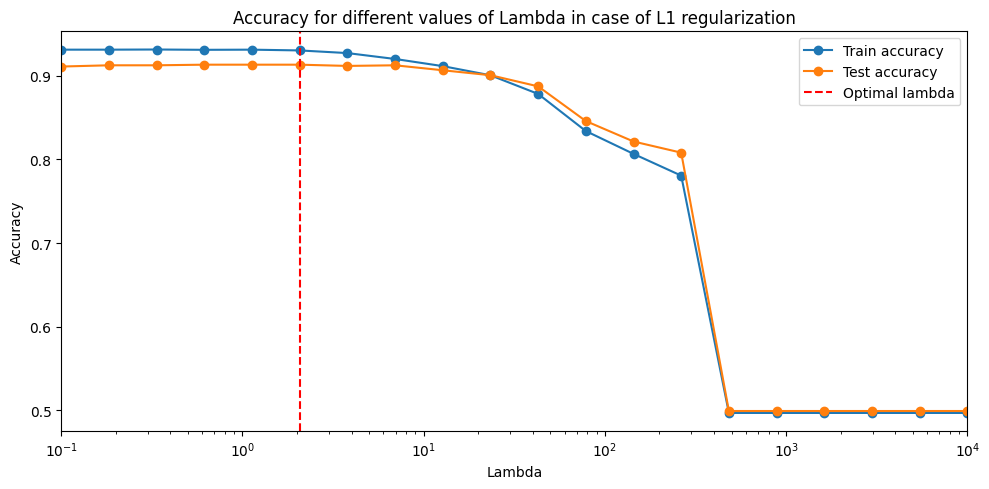

In [10]:
param_grid = [
    {'logisticregression__C': 1 / np.logspace(-1, 4, 20)}  #'C' is the inverse of lambda
]
logReg = LogisticRegression(penalty='l1', solver='liblinear')

tested_paramters_l1, trainAcc_l1, testAcc_l1, cvOptParam_l1, acc_l1 = function_evaluation(logReg,'logistic', param_grid, x_train, y_train)
display_result(tested_paramters_l1, 'Lambda', trainAcc_l1, testAcc_l1, cvOptParam_l1, ' Lambda in case of L1 regularization')

1) Case with $\mathscr{l}_2$ penalty

0.18329807108324356
In this case, the optimal parameter is 0.18 and the accuracy on test set is 93.78%


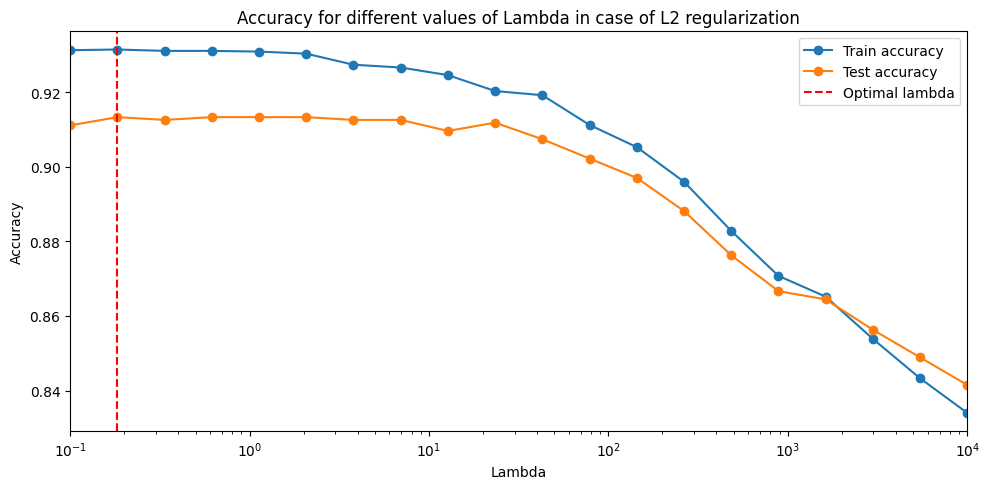

In [11]:
# perform a grid search to find the best parameter lambda

# Create a pipeline with logistic regression and scaling
logReg_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# define the parameter grid
param_grid = [
    {'logisticregression__C': 1 / np.logspace(-1, 4, 20)}  #'C' is the inverse of lambda
]

tested_parameters_l2, trainAcc_l2, testAcc_l2, cvOptParam_l2, acc_l2 = function_evaluation(logReg_l2,'logistic', param_grid, x_train, y_train)
display_result(tested_parameters_l2, 'Lambda', trainAcc_l2, testAcc_l2, cvOptParam_l2, ' Lambda in case of L2 regularization')


Now let's find the prediction and the corresponding accuracy for the test set for the two logistic regressions:

In [12]:
print(f'For the L1 regularization, the accuracy on the test set is {acc_l1*100:.2f}%')
print(f'For the L2 regularization, the accuracy on the test set is {acc_l2*100:.2f}%')

For the L1 regularization, the accuracy on the test set is 92.89%
For the L2 regularization, the accuracy on the test set is 93.78%


3) Ridge and Hinge \
a) Ridge

In [13]:
from sklearn.linear_model import RidgeClassifier

In this case, the optimal parameter is 42.81 and the accuracy on test set is 92.00%


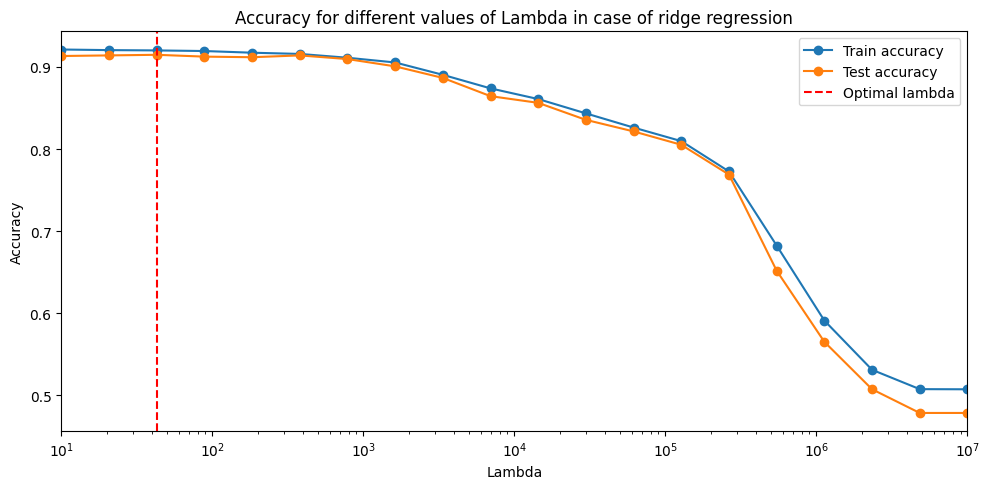

In [14]:
# Create a pipeline with Ridge regression and scaling
Ridge = RidgeClassifier()

# define the parameter grid
param_grid = [
    {'ridgeclassifier__alpha': np.logspace(1, 7, 20)/2} # alpha = 1/2C = lambda/2
]

tested_parameters_ridge, trainAcc_ridge, testAcc_ridge, cvOptParam_ridge, acc_ridge = function_evaluation(Ridge,'ridge', param_grid, x_train, y_train)
display_result(tested_parameters_ridge, 'Lambda', trainAcc_ridge, testAcc_ridge, cvOptParam_ridge, ' Lambda in case of ridge regression')

b) Hinge

In [15]:
from sklearn.svm import LinearSVC

In this case, the optimal parameter is 78.48 and the accuracy on test set is 92.67%


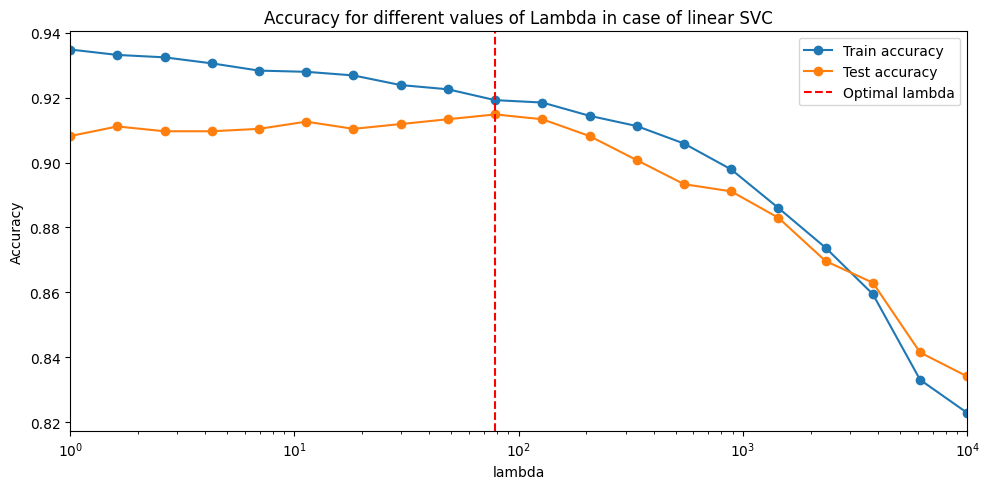

In [16]:
# Create a pipeline with LinearSVC and scaling
linear_svc = LinearSVC(loss='hinge', max_iter=100000)

param_grid = [
    {'linearsvc__C': 1 /np.logspace(0, 4, 20)}
]

tested_parameters_svc, trainAcc_svc, testAcc_svc, cvOptParam_svc, acc_svc = function_evaluation(linear_svc,'svc', param_grid, x_train, y_train)
display_result(tested_parameters_svc,'lambda', trainAcc_svc, testAcc_svc, cvOptParam_svc, ' Lambda in case of linear SVC')


In [17]:
print(f'For the Ridge case, the accuracy on the test set is {acc_ridge*100:.2f}%')
print(f'For the Hinge case, the accuracy on the test set is {acc_svc*100:.2f}%')

For the Ridge case, the accuracy on the test set is 92.00%
For the Hinge case, the accuracy on the test set is 92.67%


4. Random Forest

In this case, the optimal parameter is 10000.00 and the accuracy on test set is 96.22%


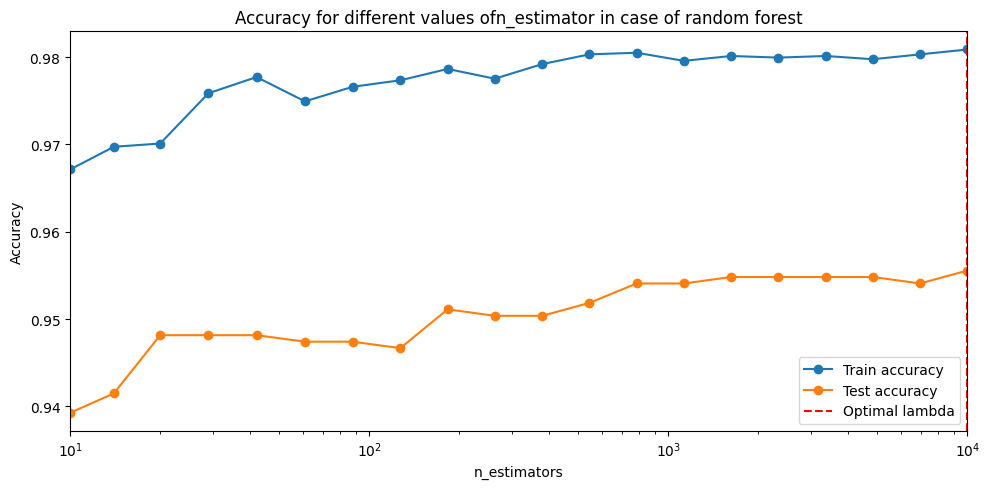

In [18]:
# Create a pipeline with LinearSVC and scaling
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=5, random_state=1, min_samples_split=5)

# define the parameter grid
param_grid = [
    {'randomforestclassifier__n_estimators': np.logspace(1, 4, 20).astype(int)}
]

tested_parameters_forest, trainAcc_forest, testAcc_forest, cvOptParam_forest, acc_forest = function_evaluation(random_forest,'forest', param_grid, x_train, y_train)
display_result(tested_parameters_forest, 'n_estimators', trainAcc_forest, testAcc_forest, cvOptParam_forest, 'n_estimator in case of random forest')



5. Random Feature

In [19]:
# define the sigmoid function for numpy arrays
def sigmoid(x):
    x = np.array(x)
    return 1 / (1 + np.exp(-x))

In [20]:
#transform the data
def transform(X_train,X_test, D, d=x_train.shape[1]):
    F = np.random.normal(scale= 1/d, size=(D,d))
    U_train = 1 / np.sqrt(D) * sigmoid(F @ X_train.T).T
    U_test = 1 / np.sqrt(D) * sigmoid(F @ X_test.T).T
    return U_train, U_test

0.005455594781168515
In this case, the optimal parameter is 0.01 and the accuracy on test set is 97.56%


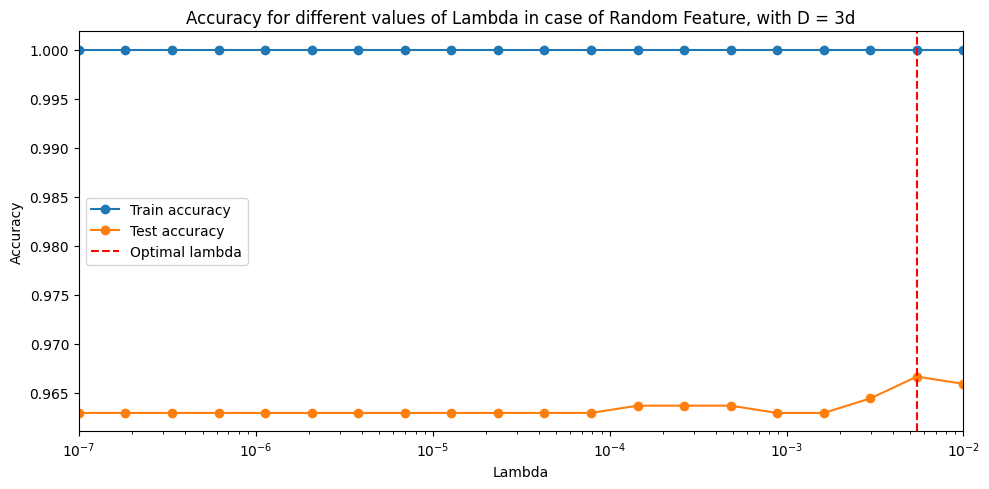

1e-07
In this case, the optimal parameter is 0.00 and the accuracy on test set is 98.44%


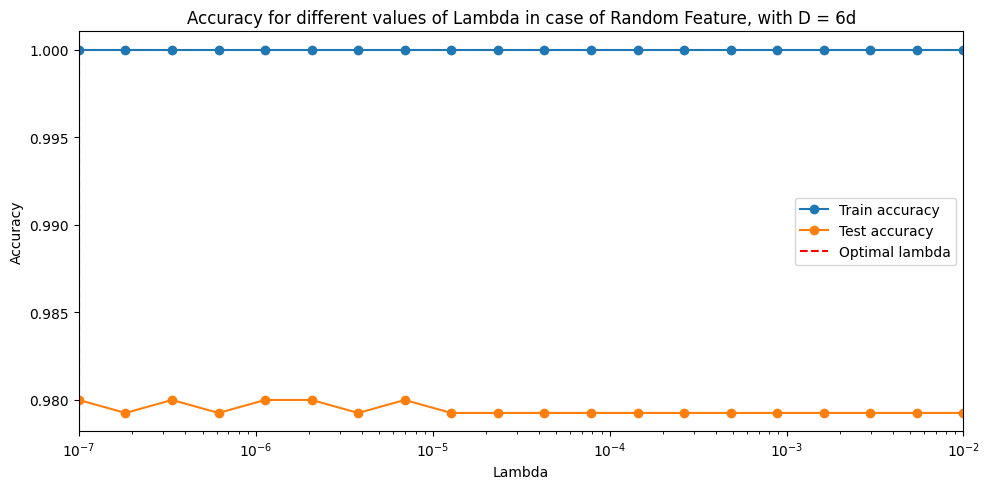

0.01
In this case, the optimal parameter is 0.01 and the accuracy on test set is 97.78%


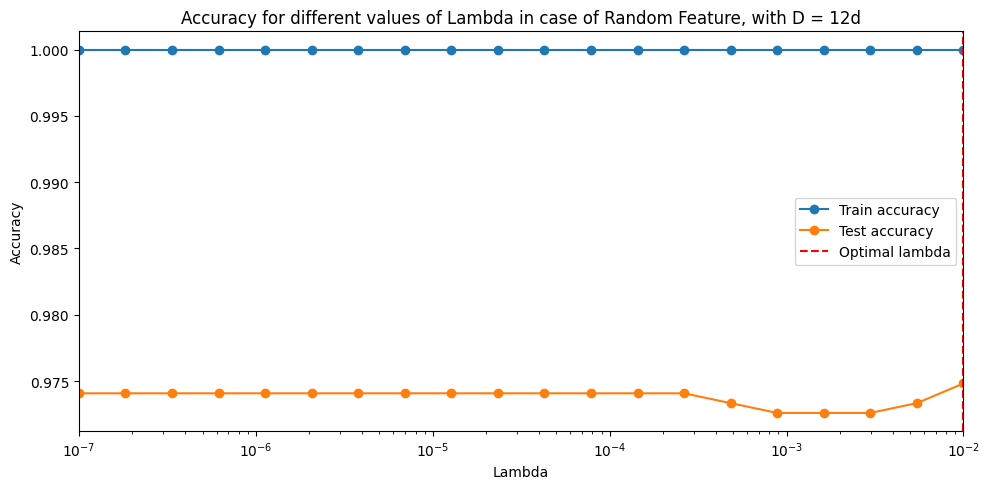

In [21]:
d = x_train.shape[1]
D_tab = np.array([3,6,12]) * d
param_grid = [
    {'logisticregression__C': 1 / np.logspace(-7, -2, 20)}  #'C' is the inverse of lambda
]

for D in D_tab:
    U_train, U_test = transform(x_train,x_test, D)
    
    logReg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=100)
    tested_parameters, trainAcc, testAcc, cvOptParam,acc = function_evaluation(logReg,'logistic', param_grid, x_train=U_train, y_train = y_train, x_test=U_test)
    display_result(tested_parameters, 'Lambda', trainAcc, testAcc, cvOptParam, ' Lambda in case of Random Feature, with D = ' + str(int(D/d))+'d')


The accuracy on the test set increases in the same way as D. But as D increases, the size of the feature increase and the time complexity becomes higher and higher. It's good noticing that as D becomes bigger, the test accuracy approaches 1. 

### Exercise 2 : Statistical Learning with Nearest-Neighbors

1. 

Lets rewrite the expression $\mathbb{E}_{X,Y}[(f(x)-y)^2]$ as $\mathbb{E}_{X,Y}[(\hat{Y})^2 - Y]$, where $\hat{Y} = f(x)$ \
Now rewrite the expectation population risk using the law of total probability:
$$
\mathcal{R} = \mathbb{E}_{X,Y}[(\hat{Y})^2 - Y] = \mathbb{E}_{X}[\mathbb{E}_{Y|X}[(\hat{Y} - Y|X])^2]
$$
In order to find the maximum, one need to derive the Risk and set it equal to zero:
$$
\frac{\partial}{\partial{\hat{Y}}} \mathbb{E}_{X}[\mathbb{E}_{Y|X}[(\hat{Y} - Y|X])^2] = 2 \mathbb{E}_{Y|X}[\hat{Y} - Y|X] = 0
\Leftrightarrow \hat{Y} = \mathbb{E}_{Y|X}[Y|X] = f_{bayes}(x) \square
$$

2. 

The excess risk is 
$$
\Delta \mathcal{R} = \mathcal{R}_{ k-NN } - \mathcal{R}_{Bayes} = \mathbb{E} _{ \textbf{X} , Y , y _i , x _i } [(Y - f_{k-NN}(x))^2 - (Y-f_{Bayes}(\textbf{X}))^2]
$$
$$
= \mathbb{E}_{\textbf{X}}[\mathbb{E}_{Y|\textbf{X}, x_i,y_i}[(Y|\textbf{X})^2 + \frac{1}{k^2} \sum_{i,j \in \mathcal{N}_k(\textbf{X})}y_iy_j - \frac{2 * Y | \textbf{X}}{k}\sum_{i \in \mathcal{N}_k(\textbf{X})}y_i] - \mathbb{V}[Y|\textbf{X}]]
$$
$$
= \mathbb{E}_{\textbf{X}}[\mathbb{E}_{Y|\textbf{X}}[(Y|\textbf{X})^2] + \frac{1}{k^2}\sum_{i \neq j}\mathbb{E}_{y_i}[y_i]\mathbb{E}_{y_j}[y_j] + + \frac{1}{k^2}\sum_{i = j}\mathbb{E}_{y_i^2}- \frac{2 * \mathbb{E}[Y | \textbf{X}]}{k}\sum_{i \in \mathcal{N}_k(\textbf{X})}y_i - \mathbb{V}[Y|\textbf{X}]]
$$

But:
 * $y_i = Y|x_i $ then $\mathbb{E}[y_i] = f_{Bayes}(x_i)$
 * $\mathbb{E}[y_i^2] = \mathbb{V}[x_i]+f_{Bayes}(x_i)$
 * $\mathbb{E}[Y|\textbf{X}] = f_{Bayes}(\textbf{X}) $
  * $\mathbb{E}[(Y|\textbf{X})^2] =\mathbb{V}[\textbf{X}] * f_{Bayes}(\textbf{X})^2 $

Then:
$$
\Delta \mathcal{R} = \mathbb{E}_{\textbf{X}}[\frac{1}{k}\mathbb{V}[Y|\textbf{X}]+ f_{Bayes}(\textbf{X})^2 - \frac{1}{k^2} \sum_{i\neq j} f_{Bayes}(x_i)f_{Bayes}(x_j) +\frac{1}{k^2} \sum_{i = j} f_{Bayes}(x_i)^2 -\frac{2}{k}f_{Bayes}(\textbf{X}) \sum_{i \in \mathcal{N}(\textbf{X})}f_{Bayes}(x_i) ]
$$
$$
= \frac{\sigma^2}{k} + \mathbb{E}_{\textbf{X}}[(\frac{1}{k}\sum_{i \in \mathcal{N}_k(\textbf{X})}f_{Bayes}(x_i)-f_{Bayes}(\textbf{X}))^2] = b^2 + v
$$

3. 

We need to prove : $$ \Delta \mathcal{R} \leq L^2(\frac{k}{n})^{2/d} + \frac{\sigma^2}{k}$$

First we nee to use the Cauchy-Schwarz inequality ($(\sum_{i=1}^n u_i v_i) \leq (\sum_{i=1}^n u_i^2)(\sum_{i=1}^n v_i^2)$):
$$
(\frac{1}{k}\sum_{i \in \mathcal{N}_k(\textbf{X})}f_{Bayes}(x_i)-f_{Bayes}(\textbf{X}))^2\leq k*\frac{1}{k^2} \sum_{i \in \mathcal{N}_k(\textbf{X})}(f_{Bayes}(x_i)-f_{Bayes}(\textbf{X}))^2
$$

Using now the fact that $f_{Bayes}$ is L-Lipschitz:
$$
\frac{1}{k} \sum_{i \in \mathcal{N}_k(\textbf{X})}(f_{Bayes}(x_i)-f_{Bayes}(\textbf{X}))^2
\leq \frac{L^2}{k} \sum_{i \in \mathcal{N}_k(\textbf{X})} || \textbf{$x_i$} - \textbf{X}||_2^2
$$

Using the expression found in 2:
$$
\Delta \mathcal{R} \leq \frac{\sigma^2}{k} +\frac{L^2}{k} \sum_{i \in \mathcal{N}_k(\textbf{X})} || \textbf{$x_i$} - \textbf{X}||_2^2
$$

The term $|| \textbf{x}_i - \textbf{X}||_2^2$ can be approximate with $l^2 = (\frac{k}{n})^{2/d}$, where n is the total number of points and d the number of feature. It can be seen with the following:
* The number of points in a certain volume should be k
* The volume of a cube is defined as $l^2$, where l is the length of the side of the cube
Then in order to have k points in the volume, we have the following equation:
$$
k = l^d * \frac{n}{V}
$$
where V is the total volume. If we set this volume to one, it remains:
$$
k = l^d * n \Leftrightarrow l = (\frac{k}{n})^{d^{-1}}
$$
Which finally leads to:
$$
|| \textbf{x}_i - \textbf{X}||_2^2 \approx l^2 =  (\frac{k}{n})^{2/d}
$$

Finally:
$$
\Delta \mathcal{R} \leq \frac{\sigma^2}{k} + L^2 (\frac{k}{n})^{2/d} \square
$$

This bound is composed of two terms, a bias term and a variance term. As k is involved in both terms, a trade-off betweem bias and variance has to be done. First, if we increase k, the variance would decrease. But at the same time, increasing k will also increase the bias. \
If we consider the consider the extrem case where $k \rightarrow \infty$, the variance term goes to zero. It makes sense: as we consider all the neighbor, the prediction will be always the same. But at the same time, the bias will be high, as the prediction will not be accurate. \
Additionaly, the Risk increases with the square of L. The less the condition on $f_{Bayes}$ is, the worse the bound for the risk is. \
Finally, it can be seen that the bias decreases as the number of samples increases. It sounds logical as the more datas we have, the more precise the prediction is.

4. 

In [64]:
k = np.logspace(0,2,100)
L = 1
sigma = 1

In [70]:
def compute_bv_trade_off(n,d):

    bias = L**2 * (k / n) ** (2/d)
    variance = sigma**2 / k
    risk = bias + variance

    optimal_k = k[np.argmin(bias + variance)]
    min_risk = min(risk)

    #Plot the result
    plt.figure(figsize=(10, 5))

    plt.plot(k, bias, label='Bias')
    plt.plot(k, variance, label='Variance')
    plt.plot(k,risk, label='Risk')

    plt.title(f'Bias-variance tradeoff for n = {n} and d = {d}')
    plt.xlabel('k')
    plt.ylabel('Risk')
    plt.axvline(optimal_k, color='r', linestyle='--', label='Optimal k')
    plt.semilogx()
    plt.legend()
    plt.show()

    #print the best parameters
    print(f'The minimum risk is {min_risk:.2f} and is achieved for k = {optimal_k:.2f}')

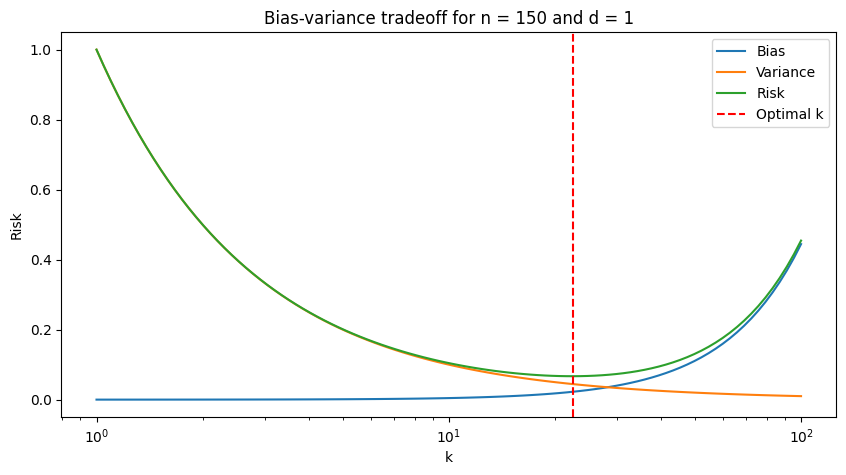

The minimum risk is 0.07 and is achieved for k = 22.57


In [71]:
compute_bv_trade_off(n=150,d=1)

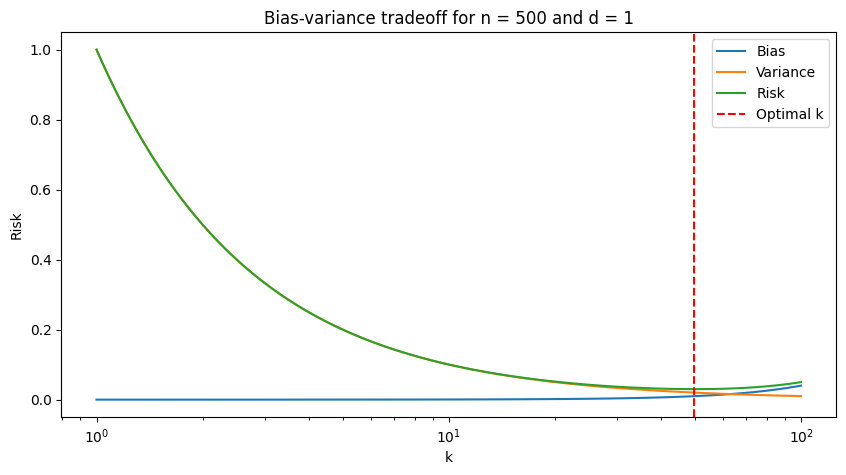

The minimum risk is 0.03 and is achieved for k = 49.77


In [73]:
compute_bv_trade_off(n=500, d=1)

By comparing these two plots, one can see that when n increases, the optimum k also increases. Since the slope of the bias curve is diminished, the the trade-off point can be moved to the right. It can also be seem that the risk is discreasing as expected.

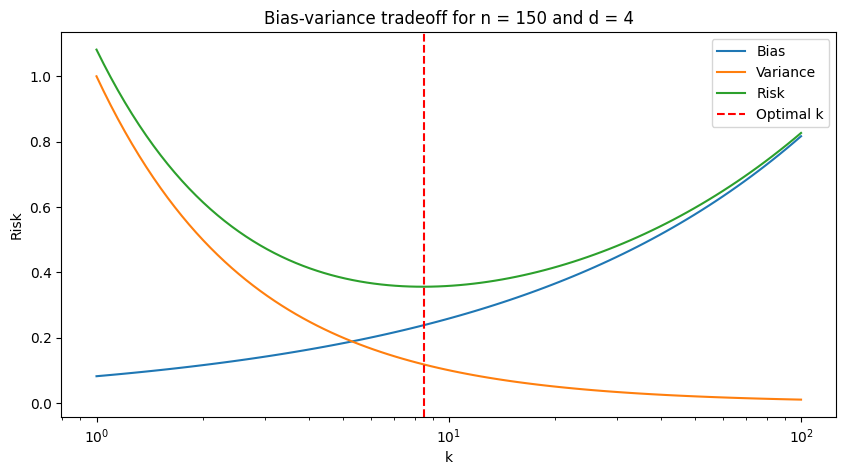

The minimum risk is 0.36 and is achieved for k = 8.50


In [80]:
compute_bv_trade_off(n=150, d=4)

In [85]:
#Interaction to see both variation of n and d
from ipywidgets import IntSlider, interact
interact(compute_bv_trade_off, n=IntSlider(min=100, max=500), d=IntSlider(min=1, max=10));

interactive(children=(IntSlider(value=100, description='n', max=500, min=100), IntSlider(value=1, description=…

5. 

In order to find the optimal k, we need to derivate the risk over k, set it equal to zero and solve for k:
$$
\frac{\partial}{\partial k} \Delta \mathcal{R} = -\frac{\sigma^2}{k^2} + \frac{L^2}{n^{2/d}} \cdot \frac{2}{d}k^{\frac{2-d}{d}} = 0
\Leftrightarrow \sigma^2 = \frac{2L^2}{dn^{\frac{2}{d}}}k^{\frac{2+d}{d}}
$$
Then:
$$
k_{opt} = (\frac{dn^{\frac{2}{d}}\sigma^2} {2L^2})^{\frac{d}{2+d}} \square
$$

$k_{opt}$ increases as n increases ($k\varpropto n^{\frac{2}{d}}$). As we have more datas, by taking more neighbors, it will in some sense eliminates the uncertainty by averaging more points.

6. 